<a href="https://colab.research.google.com/github/oleg212/ML_studies/blob/main/earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Описание задачи**

В датасете содержатся данные об землетресениях (даты, координаты, географическое положение, магнитуда, тип итд.)
Задача состоит в том, чтобы на основе данных выделить три типа регионов: "Сейсмически активные регионы", "Умеренные регионы", "Сейсмически стабильные регионы".

In [85]:
import kagglehub

path = kagglehub.dataset_download("shreyasur965/recent-earthquakes")
path += "/earthquakes.csv"
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shreyasur965/recent-earthquakes/versions/3/earthquakes.csv


In [86]:
data = pd.read_csv(path, sep=',', header=None,  engine='python')

In [87]:
type(data)

pandas.core.frame.DataFrame

In [88]:
data

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
1,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
2,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
3,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
4,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,us6000ldpm,6.3,earthquake,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,staked.radish.enduringly,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1134,us6000ldph,5.4,earthquake,"M 5.4 - 26 km NE of Zindah Jān, Afghanistan",2023-10-07T06:49:41,1696661381156,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,bloomers.wondrous.possibility,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1135,us6000ldpg,6.3,earthquake,"M 6.3 - 32 km NNE of Zindah Jān, Afghanistan",2023-10-07T06:41:03,1696660863327,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,19,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,outshone.freedmen.inequality,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1136,us6000lcgj,5.7,earthquake,"M 5.7 - 39 km NE of Dipayal, Nepal",2023-10-03T09:21:03,1696324863018,1702589211040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,131,...,"Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,NaN,investments.ticketholder.hopefulness,345,"[{'id': '87376', 'wikidataId': '', 'name': 'As..."


In [89]:
print(data)

              0          1           2   \
0             id  magnitude        type   
1     us7000necw        4.8  earthquake   
2     tx2024shcj        5.1  earthquake   
3     ci40734823        3.7  earthquake   
4     tx2024scvz        3.9  earthquake   
...          ...        ...         ...   
1133  us6000ldpm        6.3  earthquake   
1134  us6000ldph        5.4  earthquake   
1135  us6000ldpg        6.3  earthquake   
1136  us6000lcgj        5.7  earthquake   
1137  us6000ky4d        5.8  earthquake   

                                                3                    4   \
0                                            title                 date   
1              M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2              M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
3                     M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
4       M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
...                              

**Готовим данные**

Большинство столбцов не имеют никакого значения для анализа, оставим только самые необходимые. Приведем дату в Unix epoch time, заменим alert на численные значения. Заполним пропущенные значения.

In [90]:
data.columns = ['id','magnitude','type','title','date','time','updated','url','detailUrl','felt','cdi','mmi','alert','status','tsunami','sig','net','code','ids','sources','types','nst','dmin','rms','gap','magType','geometryType','depth','latitude','longitude','place','distanceKM','placeOnly','location','continent','country','subnational','city','locality','postcode','what3words','timezone','locationDetails']

relevant_columns = ['magnitude', 'latitude', 'longitude', 'depth', 'date', 'alert']
data_numerical = data[relevant_columns]

data_numerical = data_numerical.iloc[1:]

# преобразовываем 'alert'
alert_mapping = {'green': 1, 'yellow': 2, 'orange': 3, 'red': 4}
data_numerical['alert'] = data_numerical['alert'].map(alert_mapping).fillna(0)  #fillna(0) to handle missing values as 0

# преобразовываем 'date'
data_numerical['date'] = pd.to_datetime(data_numerical['date']).astype(int) / 10**9 #Unix epoch time

for column in data_numerical.columns:
        data_numerical[column] = pd.to_numeric(data_numerical[column], errors='coerce')

In [91]:
data_numerical.median(axis = 0)
data_numerical = data_numerical.fillna(data_numerical.median(axis = 0), axis = 0)

In [92]:
data_numerical.describe()

,magnitude,latitude,longitude,depth,date,alert
count,1137.000000,1137.000000,1137.000000,1137.000000,1.137000e+03,1137.000000
mean,4.856675,27.308909,-3.930635,41.287300,1.712109e+09,0.739666
std,1.047840,20.133139,118.043697,87.866489,1.143033e+07,0.621604
min,3.000000,-43.706400,-179.807000,-0.250000,1.687542e+09,0.000000
25%,3.800000,24.195400,-104.452000,7.550000,1.701663e+09,0.000000
50%,5.300000,31.667700,-68.682000,10.000000,1.713810e+09,1.000000
75%,5.600000,37.497600,126.628000,34.723000,1.722885e+09,1.000000
max,7.600000,68.176100,179.972000,639.503000,1.726661e+09,4.000000


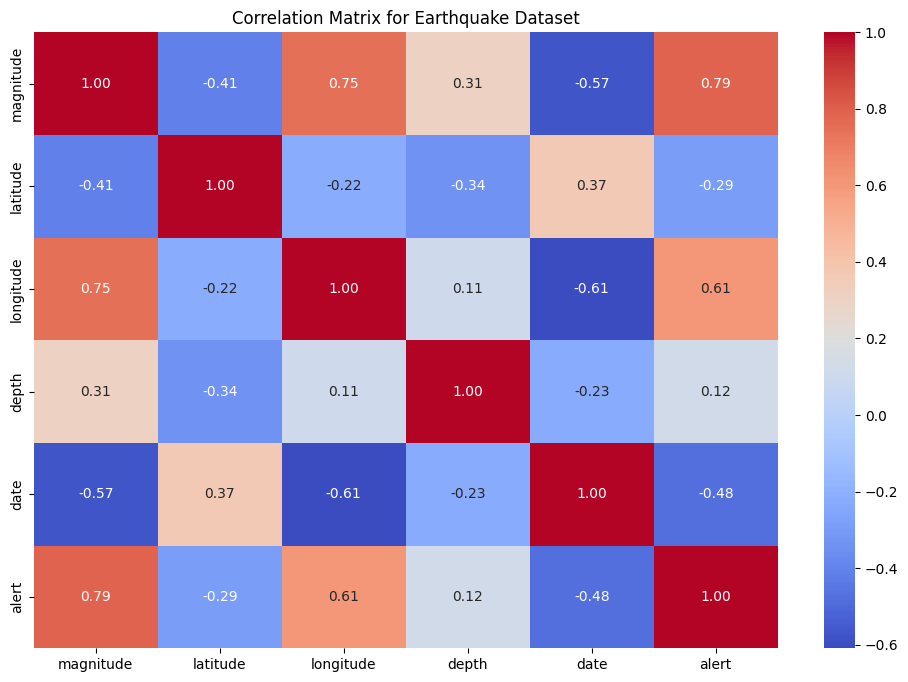

In [93]:
import seaborn as sns

correlation_matrix = data_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Earthquake Dataset")
plt.show()

**Постановка задачи**

Для произвольных координат будем делать вывод, лежит ли данная точка в сейсмически активном, умеренном или стабильном регионе. На вывод будет влиять растояние до эпицентров земтлетрясений и их магнитуда.

In [94]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from geopy.distance import geodesic

def calculate_distance_and_weight(lat1, lon1, lat2, lon2, mag2):
    # Вычисляем географическое расстояние (в километрах) между двумя точками
    dist = geodesic((lat1, lon1), (lat2, lon2)).kilometers
    # Вес зависит от магнитуды (чем больше магнитуда, тем больший вес)
    weight = mag2 / (dist + 1)  # Для предотвращения деления на ноль добавляем 1 в знаменатель
    return dist, weight

class WeightedKNN:
    def __init__(self, k=10):
        self.k = k

    def fit(self, X_train, y_train, magnitudes_train):
        self.X_train = X_train
        self.y_train = y_train
        self.magnitudes_train = magnitudes_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Список расстояний и весов для всех соседей
            distances = []
            weights = []

            for i, train_point in enumerate(self.X_train):
                # Вычисляем расстояние и вес для текущего соседа
                dist, weight = calculate_distance_and_weight(test_point[0], test_point[1],
                                                              train_point[0], train_point[1],
                                                              self.magnitudes_train[i])
                distances.append(dist)
                weights.append(weight)

            # Получаем индексы k ближайших соседей
            neighbors_indices = np.argsort(distances)[:self.k]

            # Применяем веса к меткам ближайших соседей
            weighted_votes = {}
            for idx in neighbors_indices:
                region = self.y_train[idx]
                weighted_votes[region] = weighted_votes.get(region, 0) + weights[idx]

            # Выбираем класс с максимальным весом
            predictions.append(max(weighted_votes, key=weighted_votes.get))

        return np.array(predictions)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test, mag_train, mag_test = train_test_split(
    df[['latitude', 'longitude']].values, df['region_class'].values, df['magnitude'].values,
    test_size=0.2, random_state=42
)

# Создаем и обучаем модель
knn = WeightedKNN(k=5)
knn.fit(X_train, y_train, mag_train)

# Прогнозируем на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.81      0.87        81
           1       0.85      0.92      0.88       127
           2       0.74      0.70      0.72        20

    accuracy                           0.86       228
   macro avg       0.84      0.81      0.82       228
weighted avg       0.87      0.86      0.86       228



In [95]:
from sklearn.metrics import mean_squared_error
# Вычисление ошибок
test_error = mean_squared_error(y_test, y_pred)
train_error = mean_squared_error(y_train, knn.predict(X_train))

print(f"Train Error: {train_error}")
print(f"Test Error: {test_error}")


Train Error: 0.007700770077007701
Test Error: 0.13596491228070176


**Вывод**

В данной работе была рассмотрена задача определения сейсмической активности регионов на основе данных о землетрясениях. Для этого был использован датасет, содержащий информацию о датах, координатах, магнитуде и других параметрах землетрясений.

В процессе работы были выполнены следующие шаги:

**Подготовка данных:**

Выделены наиболее релевантные признаки: магнитуда, широта, долгота, глубина, дата и уровень опасности (alert).
Преобразованы категориальные признаки (дата, alert) в числовые значения.
Заполнены пропущенные значения медианными значениями.
Проанализирована корреляция между признаками.

**Разработка модели:**

Для определения сейсмической активности регионов был разработан алгоритм взвешенного k-ближайших соседей (Weighted KNN).
Алгоритм учитывает расстояние до эпицентров землетрясений и их магнитуду при классификации точек.
Данные были разделены на обучающую и тестовую выборки для оценки качества модели.
**Оценка качества:**

Качество модели было оценено с помощью метрик classification_report и mean_squared_error.
Результаты оценки показали, что модель обладает достаточно высокой точностью.

**Заключение**

Разработанная модель позволяет определять сейсмическую активность регионов на основе данных о землетрясениях в мире. Это может быть полезно для оценки рисков и принятия решений в области строительства, страхования и других сферах.